In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [2]:
os.chdir("/Users/sanyas/Desktop")

In [3]:
DatabaseDF = pd.read_excel("novelviz.xlsx")

In [4]:
DatabaseDF.head()

,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",...,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,Compl. Type,Latitude,Longitude,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod
0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,16079.0,...,127.690116,110.009862,97.351888,88.275258,No Data,47.051150,-103.214580,NaN,660.0,33.55
1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,7269.0,...,127.832566,99.128863,83.694938,72.019505,No Data,47.111368,-103.225059,NaN,660.0,27.62
2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,8279.0,...,44.334867,36.905545,31.766382,28.566732,OH,47.097032,-103.160910,NaN,660.0,11.19
3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,9342.0,...,120.764848,99.172693,86.675433,75.882095,No Data,47.140248,-103.178391,NaN,660.0,27.85
4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,4523.0,...,227.580539,189.869603,163.163854,140.033969,OH,47.080872,-103.181300,NaN,660.0,50.88


In [5]:
DatabaseDF.describe()

,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod
count,10848.000000,10688.000000,10856.000000,10856.000000,10856.000000,1.085600e+04,10839.000000,9306.000000,9200.000000,8813.000000,8392.000000,7883.000000,10856.000000,10856.000000,10847.000000,10856.000000
mean,8914.655476,27.997754,152.173729,95.914886,18.198047,3.332069e+06,69222.382305,491.904380,394.693351,321.325614,276.575855,244.826847,47.995412,-102.976506,596.784559,98.421863
std,1833.823556,10.989723,4.829458,3.479933,10.444299,2.364422e+06,58068.128933,273.763722,217.153189,177.062031,154.128020,138.042866,0.420657,0.451102,110.862786,54.173541
min,3.000000,1.000000,139.000000,89.000000,1.000000,0.000000e+00,0.000000,1.873767,1.873767,8.355249,6.640368,5.632259,46.804382,-104.044496,18.074815,0.280000
25%,8916.000000,22.000000,149.000000,93.000000,9.000000,1.999804e+06,34778.000000,291.157133,238.242384,198.411133,171.439660,151.727208,47.759769,-103.324524,578.587387,60.917500
50%,9427.000000,30.000000,152.000000,96.000000,18.000000,2.958260e+06,55127.000000,454.043393,362.354810,292.915845,250.867485,220.312842,47.993790,-102.928989,660.000000,88.970000
75%,9799.000000,34.000000,155.000000,99.000000,27.000000,3.879750e+06,80064.000000,640.828402,506.618453,407.653956,349.568997,309.149682,48.238771,-102.617006,660.000000,124.847500
max,22231.000000,94.000000,164.000000,105.000000,36.000000,2.874457e+07,598562.000000,2264.727153,1819.044488,1635.179706,1458.075827,1390.343524,48.994837,-102.071631,660.000000,495.810000


We are able to see the general breakdown of the data and the overview of each of the features. Dataframe.describe() allows us to see the overall data we are working with 

In [6]:
DatabaseDF.shape

(10856, 22)

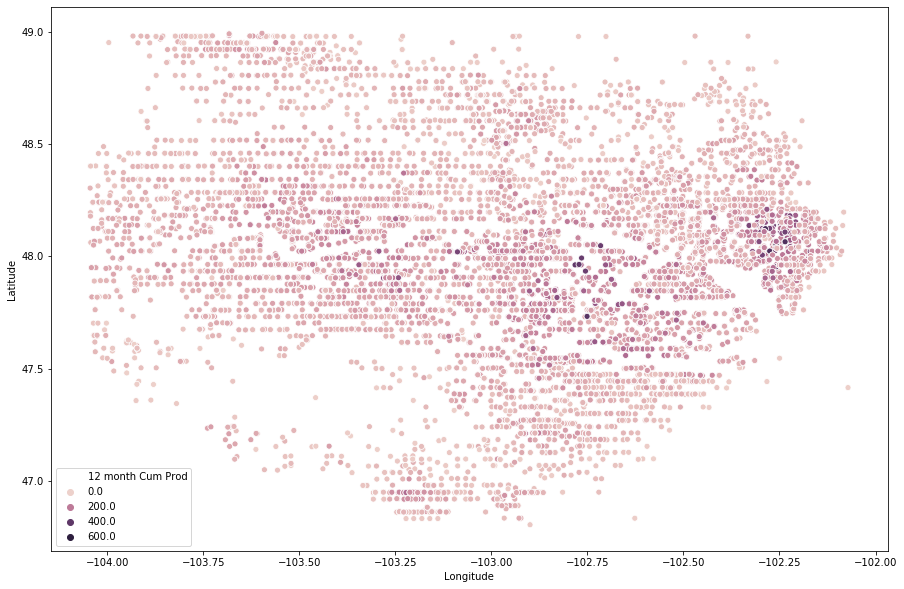

In [7]:
plt.subplots(figsize = (15,10))
sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = '12 month Cum Prod',data = DatabaseDF)

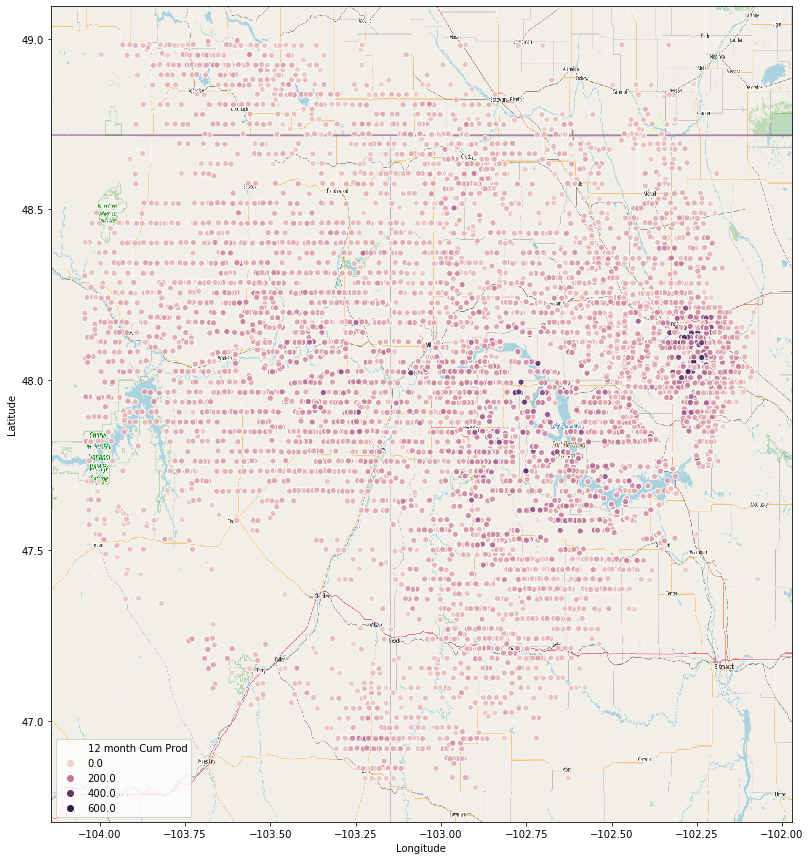

In [8]:
padding = .1

BBox = ((DatabaseDF.Longitude.min() - padding,   DatabaseDF.Longitude.max() + padding,      
         DatabaseDF.Latitude.min() - padding, DatabaseDF.Latitude.max() + padding))

areaMap = plt.imread("RegionMap.png")

fig, ax = plt.subplots(figsize = (15,10))

fig.set_size_inches(15,15)

ax = sns.scatterplot(x = DatabaseDF['Longitude'], y = DatabaseDF['Latitude'], hue = DatabaseDF['12 month Cum Prod'])
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(areaMap, zorder = 0, extent = BBox, aspect = 'equal')

We are able to pinpoint locations which have the most production in oil which is between Longitude of -102.5 - -102.25 and latitude of 48 - 48.5.

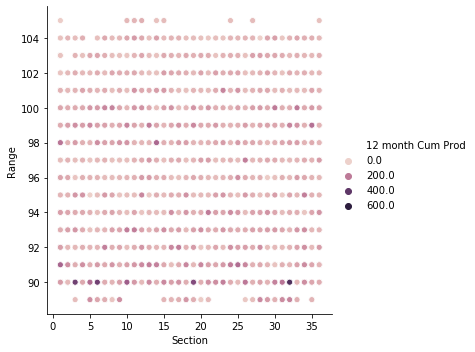

In [9]:
sns.relplot(x = "Section", y = "Range", hue = '12 month Cum Prod', data = DatabaseDF)

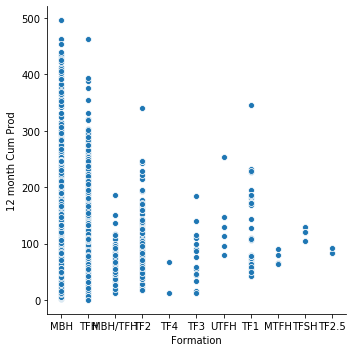

In [10]:
sns.relplot(x = "Formation", y = "12 month Cum Prod", data = DatabaseDF)

MBH Formation has most production compared to other formations

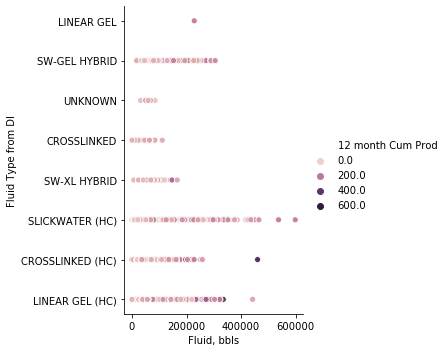

In [11]:
sns.relplot(x = "Fluid, bbls", y = "Fluid Type from DI", hue = '12 month Cum Prod', data = DatabaseDF)

Linear Gel greater than 200000 Fluid bbls will produce the most oil. Based on the fluid type going in, Linear Gel is the most effective

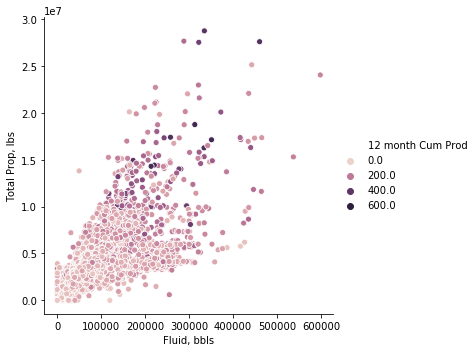

In [12]:
sns.relplot(x = "Fluid, bbls", y = "Total Prop, lbs", hue = '12 month Cum Prod', data = DatabaseDF)

Fluid, bbls greater than 200000 and total prop. lbs greater than 1 lbs will more than likely produce most oil optimization